In [1]:
#!pip install sqlalchemy
#!pip install psycopg2

import time
import re
from sqlalchemy import create_engine
import json
import pandas as pd
import numpy as np
import psycopg2
from config import db_password

In [2]:
# Define variable s for database connection

protocol = "postgres"
user = "postgres"
location = "localhost"
port = "5432"
db = "movie_data"

connection_string = f'{protocol}://{user}:{db_password}@{location}:{port}/{db}'
 


In [3]:
engine = create_engine(connection_string)

In [4]:
file_dir = 'c:/Users/Franc/Berkeley/class_folder/Movies_ETL/Resources'

In [5]:
with open(f'{file_dir}/wikipedia.movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [6]:
len(wiki_movies_raw)


7311

In [7]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [8]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [9]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [10]:
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv')

ratings = pd.read_csv(f'{file_dir}/ratings.csv')

C:\Users\Franc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
kaggle_metadata.head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [12]:
ratings.head()


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [13]:
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
13192,False,NaN,40000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.delgo.com/,20542,tt0361500,en,Delgo,"In a divided land, it takes a rebellious boy a...",...,2008-12-12,0.0,94.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Delgo,False,5.4,15.0
44633,False,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,67409,tt0045709,en,Duck Dodgers in the 24½th Century,Space hero Daffy battles Marvin the Martian fo...,...,1953-07-25,0.0,7.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Duck Dodgers in the 24½th Century,False,7.7,36.0
21423,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://www.killeratlarge.com/,37312,tt0903660,en,Killer at Large,Obesity rates in the United States have reache...,...,2008-11-21,0.0,102.0,[],Released,NaN,Killer at Large,False,5.8,6.0
31085,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,214210,tt2991092,fr,Eastern Boys,They come from all over Eastern Europe: Russia...,...,2013-04-02,0.0,128.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Eastern Boys,False,6.4,39.0
37909,False,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",NaN,195030,tt2421764,fr,Palmipédarium,"Simon knows ducks quite well. They make noise,...",...,2012-09-14,0.0,10.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Palmipedarium,False,7.6,4.0


In [14]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
7232361,74498,76077,3.5,1452480062
3607739,37592,1282,3.0,1121353778
22637504,235232,33166,3.0,1335707344
24613814,255837,1297,3.0,856485352
20374016,211763,296,5.0,1466146537


In [15]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)


wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
wiki_movies_df.columns.tolist()



['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [17]:
# 8.3.3 Create a list comprehension with a filter expression

wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie]

len(wiki_movies)

7080

In [18]:
wiki_movies_df = pd.DataFrame(wiki_movies)

len(wiki_movies_df)

7080

In [19]:
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]

len(wiki_movies)


7076

In [20]:
# 8.3.4 FUNCTION

def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    return movie

# Look for a movie with Arabic in it.

wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6838,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7062,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [21]:
# Let's include the url and Arabic colums as filter

wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']


6838    https://en.wikipedia.org/wiki/The_Insult_(film)
7062     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [22]:
# Sort for alternate title values in the columns


sorted(wiki_movies_df.columns.tolist())


['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'No. of episodes',
 'Opening theme',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russ

In [23]:


def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    return movie

In [24]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]


wiki_movies_df = pd.DataFrame(clean_movies)

sorted(wiki_movies_df.columns.tolist())



['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [25]:
def clean_movie(movie): # Create a function
    
    movie = dict(movie) #create a non-destructive copy of movie
  
    alt_titles = {}     #Create an empty list for alt_title 
                        # combine alternate titles into one list
        
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
   
    if len(alt_titles) > 0:    # Use the length of alt_titles to check or validate value
        movie['alt_titles'] = alt_titles  # Convert to alt_titles

    # merge column names
    def change_column_name(old_name, new_name):  # Create a function change_column_name old and new 
        
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)   # Use pop() method to consolidate columns with
                                                    # same data into one or change the name of a key
   
    change_column_name('Adaptation by', 'Writer(s)') # Go through and decide if there’s a better name for it.
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

In [26]:
# make a list of cleaned movies with a list comprehension

clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [27]:
# Set wiki_movies_df to be the DataFrame created from clean_movies,
# and print out a list of the columns.


wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [28]:
# 8.3.7 Extraxt IMDB_ID from imdb_link

wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')

In [29]:
# Create a list comprehension with 
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]


wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

wiki_movies_df.head()


,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018


In [30]:
# Check the data types of the wiki_movies DataFrame

wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [31]:
# List comprehension

[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [32]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]


In [33]:
len(wiki_movies_df)

7076

In [34]:
box_office = wiki_movies_df['Box office'].dropna() 

In [35]:
# check the number of rows after droping data

box_office.head(5)


len(box_office)

5517

In [36]:
# 8.3.10 Begin REgular Expression

form_one = r'\$\d+\.?\d*\s*[mb]illion' # Create a variable for the first regular expression
                                       # To count up how many box office values match our first form
                                       # Use str.contain() method. Set the flag to ignore case
        
        
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()



3842

In [37]:
# Create another variable form two for the next regular expression

form_two = r'\$\d{1,3}(?:,\d{3})+'



box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1505

In [38]:
# Create two Bolean Series and set them equal to Box Office values that does not match either

matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)


matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)



In [39]:
# 8.3.10 Parse the Box Office Data to Numeric values

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [40]:
# First we need to extract the values from Box Office using .str.extract. Then, apply
# parse_dollars to the first column in the DataFrame returned by .str.extract
 


wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)




In [41]:
# Drop Box Office column because we no longer need it

wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [42]:
# 8.3.11 Create a budget variable ..............STEP 1

budget = wiki_movies_df['Budget'].dropna()

# Convert any lists to strings:

budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

# Remove any values between a dollar sign and a hyphen (for budgets given in ranges)


In [43]:
# ........................................STEP 2


matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget[~matches_form_one & ~matches_form_two]

110                     $5–7 million
135                   USD$ 9 million
136                          Unknown
165                   $15-20 million
196     $6.5–10 million [1] [Note 1]
                    ...             
7062                $100–150 million
7066                $160–200 million
7067                $102–135 million
7068                  $39–50 million
7070                    €4.3 million
Name: Budget, Length: 308, dtype: object

In [44]:
# Remove the citation reference, that is the number in square brackets......STEP 3

budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

110                 $5–7 million
135               USD$ 9 million
136                      Unknown
165               $15-20 million
196     $6.5–10 million [Note 1]
                  ...           
7062            $100–150 million
7066            $160–200 million
7067            $102–135 million
7068              $39–50 million
7070                €4.3 million
Name: Budget, Length: 308, dtype: object

In [45]:
# Parse Budget using the same code as in Box Office. Replace box_office with budget....STEP 4

wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)


wiki_movies_df['budget'].head()

0    20000000.0
1     6000000.0
2    35000000.0
3    12000000.0
4    25000000.0
Name: budget, dtype: float64

In [46]:
# As we did in Box Office, Drop the Budget column...............STEP 5

wiki_movies_df.drop('budget', axis=1, inplace=True)

In [47]:
wiki_movies_df.head()


,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Director,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),Writer(s),imdb_id,box_office
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Cliff Eidelman, Yello]","[Steve Perry, Joel Silver]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987,21400000.0
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,James Foley,Avenue Pictures,Howard E. Smith,Maurice Jarre,"[Ric Kidney, Robert Redlin]",Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994,2700000.0
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Charles Gross,Daniel Melnick,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005,57718089.0
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,Woody Allen,Orion Pictures,Susan E. Morse,NaN,Robert Greenhut,NaN,Woody Allen,tt0099012,7331647.0
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,John Cornell,Paramount Pictures,David Stiven,Maurice Jarre,John Cornell,NaN,Paul Hogan,tt0099018,6939946.0


In [48]:
# Parse Release Date .............................STEP 1

release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)



In [49]:
# Parse the Forms .................................STEP 2


date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [50]:
# Extraxct the dates .............................STEP 3

release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)


,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,2018
7074,"August 31, 2018"


In [51]:
# Parse the dates with built_in date function. We do not need to create a function .....STEP 4

wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)




In [52]:
# Parse running time

running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)


In [53]:
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()

6569

In [54]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 367, dtype: object

In [55]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()


6919

In [56]:
# Output

running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [57]:
# With our new pattern, it’s time to extract values. We only want to extract digits,
# and we want to allow for both possible patterns. Therefore, we’ll add capture groups around the \d instances as well as add an alternating character. 
# Our code will look like the following.



running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [58]:
# This new DataFrame is all strings, we’ll need to convert them to numeric values.

running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)


In [59]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [60]:
# Drop the running time column as we did with all in the past



In [61]:
# 8.3.12 Clean the Kaggle Data    First Inspect the data

kaggle_metadata.dtypes



adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [62]:
# Convert to values

kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [63]:

# Remove Bad Data

kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Drop the adult column

kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [65]:
# Check to see te values of the video column

kaggle_metadata['video'].value_counts()


False    45358
True        93
Name: video, dtype: int64

In [66]:
# Convert video column

kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [67]:
# Assign it back to Video column after its been converted to what we want

kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [68]:
# Convert Kaggle to Numeric

kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [69]:
# Convert Release Date

kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [70]:
# Checking on Ratings Data

ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [71]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [72]:
# Assign it to Timestamp column


ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

In [73]:
#SKIPPING BAR GRAPH and PLOTTING  DUE TO MEMORY OVERLOAD

wiki_movies_df.dtypes

url                              object
year                              int64
imdb_link                        object
title                            object
Based on                         object
Starring                         object
Cinematography                   object
Release date                     object
Running time                     object
Country                          object
Language                         object
Budget                           object
Director                         object
Distributor                      object
Editor(s)                        object
Composer(s)                      object
Producer(s)                      object
Production company(s)            object
Writer(s)                        object
imdb_id                          object
box_office                      float64
release_date             datetime64[ns]
running_time                    float64
dtype: object

In [74]:
#ratings['rating'].plot(kind='hist')
#ratings['rating'].describe()

In [75]:
# Print out a list of the columns so we can identify which ones are redundant. 
# Use the suffixes parameter to make it easier to identify


# Continue 8.4.1

movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [76]:
movies_df[['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6086,A Fantastic Woman,A Fantastic Woman
6087,Permission,Permission
6088,Loveless,Loveless
6089,Gemini,Gemini


In [77]:
# Look at the rows where the titles don’t match.


#movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

In [78]:
# Let’s confirm there aren’t any missing titles in the Kaggle data with the following code:

 

movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Running time,Country,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


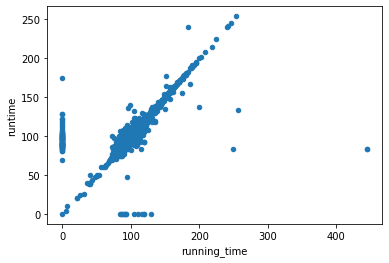

In [79]:
# Fill in the missing values with zero and plot

movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

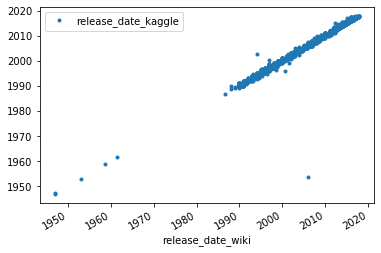

In [80]:
movies_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

In [81]:
#We should investigate that wild outlier around 2006. We’re just going to choose some
#rough cutoff dates to single out that one movie. We’ll look for any movie whose release
#date according to Wikipedia is after 1996, but whose release date according to Kaggle is before 1965. 
#Here’s what your code should look like:

movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]



,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Running time,Country,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
3633,https://en.wikipedia.org/wiki/The_Holiday,2006,https://www.imdb.com/title/tt00457939/,The Holiday,NaN,"[Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...",Dean Cundey,"[December 8, 2006, (, 2006-12-08, )]",136 minutes,United States,...,1953-08-28,30500000.0,118.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pouring out of impassioned pages...brawling th...,From Here to Eternity,False,7.2,137.0


In [82]:
#Based on the output, it looks like somehow The Holiday in the Wikipedia data
#got merged with From Here to Eternity. We’ll have to drop that row from our DataFrame.
#We’ll get the index of that row with the following:


movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index

Int64Index([3633], dtype='int64')

In [83]:
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

In [84]:
movies_df[movies_df['release_date_wiki'].isnull()]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Release date,Running time,Country,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
1021,https://en.wikipedia.org/wiki/Black_Scorpion_(...,1995,https://www.imdb.com/title/tt0112519/,Black Scorpion,NaN,"[Joan Severance, Bruce Abbott, Garrett Morris]",Geoff George,NaN,90 min.,United States,...,1995-08-22,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Justice has a nasty sting.,Black Scorpion,False,6.1,7.0
1074,https://en.wikipedia.org/wiki/Flirt_(1995_film),1995,https://www.imdb.com/title/tt0113080/,Flirt,NaN,"[Bill Sage, Dwight Ewell, Miho Nikaido]",Michael Spiller,NaN,83 minutes,"[United States, Germany, Japan, [1]]",...,1995-09-14,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Flirt,False,7.5,4.0
1134,https://en.wikipedia.org/wiki/Let_It_Be_Me_(19...,1995,https://www.imdb.com/title/tt0113638/,Let It Be Me,NaN,NaN,Miroslav Ondrícek,NaN,NaN,NaN,...,1995-11-17,0.0,95.0,[],Released,NaN,Let It Be Me,False,8.0,2.0
1580,https://en.wikipedia.org/wiki/A_Brooklyn_State...,1997,https://www.imdb.com/title/tt0118782/,A Brooklyn State of Mind,NaN,NaN,Ken Kelsch,NaN,NaN,NaN,...,1998-01-01,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Brooklyn State of Mind,False,5.0,1.0
1649,https://en.wikipedia.org/wiki/Highball_(film),1997,https://www.imdb.com/title/tt0119291/,Highball,NaN,"[Justine Bateman, Peter Bogdanovich, Chris Eig...",Steven Bernstein,NaN,110 minutes,United States,...,1997-01-01,0.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Highball,False,4.5,4.0
1793,https://en.wikipedia.org/wiki/Velocity_Trap,1997,https://www.imdb.com/title/tt0120435/,Velocity Trap,NaN,"[Olivier Gruner, Alicia Coppola, Ken Olandt]",Philip D. Schwartz,NaN,89 minutes,United States,...,1999-02-22,0.0,86.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Crime at the Speed of Light,Velocity Trap,False,4.7,6.0
2406,https://en.wikipedia.org/wiki/The_Visit_(2000_...,2000,https://www.imdb.com/title/tt0199129/,The Visit,NaN,"[Hill Harper, Billy Dee Williams, Obba Babatun...",John L. Demps Jr.,NaN,107 minutes,NaN,...,2000-01-01,0.0,107.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,NaN,The Visit,False,0.0,0.0
2811,https://en.wikipedia.org/wiki/Stevie_(2002_film),2002,https://www.imdb.com/title/tt0334416/,Stevie,NaN,NaN,"[Dana Kupper, Gordon Quinn, Peter Gilbert]",NaN,144 min,United States,...,2002-09-09,97000.0,140.0,[],NaN,NaN,Stevie,False,6.7,13.0
3200,https://en.wikipedia.org/wiki/Return_to_Sender...,2004,https://www.imdb.com/title/tt0396190/,Return to Sender,NaN,"[Aidan Quinn, Connie Nielsen, Mark Holton]",NaN,NaN,NaN,"[Denmark, USA, UK]",...,2004-09-17,0.0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"How can you save someone, who won't save herself?",Return to Sender,False,5.9,13.0
3677,https://en.wikipedia.org/wiki/Live_Free_or_Die...,2006,https://www.imdb.com/title/tt0432318/,Live Free or Die,NaN,"[Aaron Stanford, Paul Schneider, Ebon Moss-Bac...",NaN,NaN,89 minutes,United States,...,2006-03-11,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Live Free or Die,False,5.5,8.0


In [85]:
movies_df['Language'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


English                                 5513
[English, Spanish]                        69
[English, French]                         35
[English, Japanese]                       27
[English, Russian]                        23
                                        ... 
[English, Scottish Gaelic]                 1
Russian                                    1
[English, French, Kinyarwanda]             1
[Japanese, English, Cantonese]             1
[Albanian, English, French, Spanish]       1
Name: Language, Length: 197, dtype: int64

In [86]:
#We need to convert the lists in Language to tuples so that the value_counts() method
#will work. See the following code:


movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

English                                         5513
NaN                                              134
(English, Spanish)                                69
(English, French)                                 35
(English, Japanese)                               27
                                                ... 
(English, Dutch)                                   1
(English /, Zulu)                                  1
(English,, Bosnian, ,, Croatian, ,, Serbian)       1
(Aramaic, [1], English, Portuguese)                1
(English, French, Khmer, Russian)                  1
Name: Language, Length: 198, dtype: int64

In [87]:
# For the Kaggle data, there are no lists, so we can just run value_counts() on it.



movies_df['original_language'].value_counts(dropna=False)

en    6026
fr      16
es      10
it       8
de       6
pt       4
zh       4
ja       4
hi       2
da       2
sv       1
ko       1
ar       1
cn       1
ab       1
he       1
tr       1
ru       1
Name: original_language, dtype: int64

In [88]:
movies_df[['Production company(s)','production_companies']]

,Production company(s),production_companies
0,Silver Pictures,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]","[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...
6086,"[Fabula, Komplizen Film]","[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6087,Ball & Chain Productions,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6088,"[Arte France Cinéma, Why Not Productions]","[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6089,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


In [89]:

# First, we’ll drop the title_wiki, release_date_wiki, Language, and Production company(s) columns.


movies_df.drop(columns=['title_wiki','release_date_wiki','Language','Production company(s)'], inplace=True)




In [90]:

def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column, inplace=True)



In [91]:
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
movies_df

KeyError: 'budget_kaggle'

In [ ]:
# 8.4.2 Transform and merge ratings data
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count()



In [ ]:
# Rename the userid column to count

rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1) 


In [ ]:
#We can pivot this data so that movieId is the index, the columns will be all the rating values, and the rows will be the counts 
#for each rating value.

rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1) \
                .pivot(index='movieId',columns='rating', values='count')


In [ ]:
rating_counts.columns = ['rating_' + str(col) for col in rating_counts.columns]


ratings.head(5)


In [ ]:
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

In [ ]:
#movies_with_ratings_df = pd.merge(movies_df, rating_counts, left_on='kaggle_id', right_index=True, how='left')

In [ ]:
movies_with_ratings_df[rating_counts.columns] = movies_with_ratings_df[rating_counts.columns].fillna(0)


In [ ]:
# First, we need to use a groupby on the “movieId” and “rating” columns and take the count for each group.

rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count()



In [ ]:
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1) 

In [ ]:


rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1) \
                .pivot(index='movieId',columns='rating', values='count')



In [ ]:
#This time, we need to use a left merge, since we want to keep everything in movies_df:


movies_with_ratings_df = pd.merge(movies_df, rating_counts, left_on='kaggle_id', right_index=True, how='left')

In [ ]:
# Finally, because not every movie got a rating for each rating level, there will be missing values instead of zeros. We have to fill those in ourselves, 
# like this:


movies_with_ratings_df[rating_counts.columns] = movies_with_ratings_df[rating_counts.columns].fillna(0)

In [ ]:
# 8.5.1 Connect Pandas to SQL
# Create engine and connection string for db_string done at the begining of the code.


# Import the Movie Data using to_sql() method

#movies_df.to_sql(name='movies', con = engine)


In [ ]:
# Import the Ratings Data

rows_imported = 0

# get the start_time from time.time()

start_time = time.time()
for data in pd.read_csv(f'{file_dir}/ratings.csv', chunksize=1000000):
    print(f'importing rows {rows_imported} to {rows_imported + len(data)}...', end='')
    data.to_sql(name='ratings', con=engine, if_exists='append')
    rows_imported += len(data)

    # add elapsed time to final print out
    print(f'Done. {time.time() - start_time} total seconds elapsed')